In [50]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [51]:
import pandas as pd
import numpy as np

class IS_Entry:
    """
    Class defining a record in the Income Statement.
    """
    
    
    def __init__(self, name, entry_type, *args):
        """
        Constructor for IS_entry class.
        
        Parameters
        ----------
        self : IS_Entry
            IS_Entry object whose calling the function.
        name : str
            Name for identifying the income Statement entry.
        entry_type : bool
            0 for revenues type, and 1 for costs type.
        minimum_value : int
            Minimum value the entry can have.
        maximum_value : int
            Maximum value the entry can have.
        intervals : int
            Number of intervals to divide the range into.
        range_values : [int]
            Numpy Array of values for the entry.
        """
        if len(args) == 3:
            print(
                "Creating a value range with minimum value={}, maximum value={} and number of intervals={}".format(args[0], args[1], args[2])
            )
            self.name = name
            self.entry_type = entry_type
            self.range_values = np.round(np.linspace(args[0], args[1], num=args[2]))
        
        elif len(args) == 1:
            print(
                "Assign range of values with minimum value={}, maximum value={} and number of intervals={}".format(args[0][0], args[0][len(args[0])-1], len(args[0]))
            )
            self.name = name
            self.entry_type = entry_type
            self.range_values = args[0]
        
        else:
            self.name = name
            self.entry_type = entry_type
            self.range_values = np.array(int)
            
    
    def modify_range_values(self, *args):
        """
        Function for modifying range values.
        
        Parameters
        ----------
        self : IS_Entry
            IS_Entry object whose calling the function.
        minimum_value : int
            Minimum value the entry can have.
        maximum_value : int
            Maximum value the entry can have.
        intervals : int
            Number of intervals to divide the range into.
        range_values : [int]
            Numpy Array of values for the entry.
            
        Returns
        -------
        The range of values before the modification.
        """
        if len(args) == 3:
            print(
                "Modifying values with range with minimum value={}, maximum value={} and number of intervals={}".format(args[0], args[1], args[2])
            )
            former_range = self.range_values
            self.range_values = np.round(np.linspace(args[0], args[1], num=args[2]))
       
        elif len(args) == 1:
            print(
                "Modifying values with already created range with minimum value={}, maximum value={} and number of intervals={}".format(args[0][0], args[0][len(args[0])-1], len(args[0]))
            )
            former_range = self.range_values
            self.range_values = args[0]

        else:
            print(
                "Not valid arguments for modifying range of values. None modifications have been made."
            )
            former_range = self.range_values
            
        return former_range

In [52]:
class Income_Statement:
    """
    Class representing an Income Statement for a specific year.
    """
    
    
    def __init__(self, name, year, tax, *args):
        """
        Constructor for Income_Statement class.
        
        Parameters
        ----------
        self : Income_Statement
            Income_Statement object whose calling the function.
        name : str
            Name of the company.
        year : int
            Year of the Income Statement.
        tax : int
            tax that appliers to the specific company.
        """
        self.name = name
        self.year = year
        self.tax = tax
        self.entries = {}
        self.gross_profit = np.array(int)
        self.gros_margin = 0
        self.ebitda = np.array(int)
        self.ebit = np.array(int)
        self.ebt = np.array(int)
        self.profit = np.array(int)
        print("Created new Income Statement of year={} for company {}, with tax={:.2%}".format(year, name, tax))


    def add_entry(self, name, entry_type, *args):
        """
        Function for adding an entry to the income statement.
        
        Parameters
        ----------
        self : Income_Statement
            Income_Statement object whose calling the function.
        name : str
            Name for identifying the income Statement entry.
        entry_type : bool
            True for revenues type and False for costs type.
        minimum_value : int
            Minimum value the entry can have.
        maximum_value : int
            Maximum value the entry can have.
        intervals : int
            Number of intervals to divide the range into.
        range_values : [int]
            Numpy Array of values for the entry.
            
        Returns
        -------
        IS_Entry
            The Income Statement Entry object that is added to the Income Statement.
        """
        entry = IS_Entry(name, entry_type, *args)
        self.entries[name] = entry
        
        return entry
    
    
    def modify_entry_values(self, name, *args):
        """
        Function for modifing the entry range values.
        
        Parameters
        ----------
        self : Income_Statement
            Income_Statement object whose calling the function.
        name : str
            Name of the entry to be modified.
        minimum_value : int
            Minimum value the entry can have.
        maximum_value : int
            Maximum value the entry can have.
        intervals : int
            Number of intervals to divide the range into.
        range_values : [int]
            Numpy Array of values for the entry.

        Returns
        -------
        The range of values before the modification.
        """
        # TODO: Create case when name is nor an existing entry.
        entry = self.entries[name]
        former_values = entry.modify_range_values(*args)
        
        return former_values
    
    
    def calculate_result_from_entries(self, entry_1, entry_2):
        """
        Calculate all possible results from combinations of 2 lines from the income statement.
        
        Parameters:
        -----------
        entry_1: str
            Name of first entry to calculate result from.
        entry_2: str
            Name of second entry to calculate result from.
            
        Returns:
        --------
        A numpy array with all results sorted.
        """
        if not self.entries[entry_1] or not self.entries[entry_2]:
            
            print("Not valid names for Income Statement entries")
            
            return
        
        else:
            
            if self.entries[entry_1].entry_type:
                results1=self.entries[entry_1].range_values
            else: 
                results1=-1*(self.entries[entry_1].range_values)
            if self.entries[entry_2].entry_type:
                results2=self.entries[entry_2].range_values
            else:
                results2=-1*(self.entries[entry_2].range_values)
        
            result = []
            for i in itertools.product(results1, results2):
                result.append(i[0] + i[1])

            return np.array(sorted(result))
        
    
    def calculate_result_from_values(self, partial_vals, entry_2):
        """
        Calculate all possible results from combinations of 2 lines from the income statement. The first line
        is a range of values while the second one is a name for an entry.
        
        Parameters:
        -----------
        partial_vals: (int)
            Array of integers
        entry_2: str
            Name of second entry to calculate result from.
            
        Returns:
        --------
        A numpy array with all results.
        """
        if not self.entries[entry_2]:
            
            print("Not valid name for Income Statement entry")
            
            return
        
        else:
            
            if self.entries[entry_2].entry_type:
                results2=self.entries[entry_2].range_values
            else:
                results2=-1*(self.entries[entry_2].range_values)
        
            result = []
            for i in itertools.product(partial_vals, results2):
                result.append(i[0] + i[1])

            return np.array(result)
    
    
    def calculate_gross_profit(self, gross_margin):
        """
        Calculate Gross Margin for the Income Statement
        
        Parameters:
        -----------
        gross_margin : int
            Average % gross margin for the company.
        
        Returns:
        --------
        np.array(int)
            Numpy array of integers representing gross profits.
        """
        self.gross_margin = gross_margin
        self.add_entry("cogs", False, (1-gross_margin)*(self.entries["revenues"].range_values))
        self.gross_profit = gross_margin*(self.entries["revenues"].range_values)
        
        return self.gross_profit
    
    
    def calculate_ebitda(self):
        """
        Calculate Ebitda for the Income Statement.
        
        Returns:
        --------
        np.array(int)
            Numpy array of integers representing ebitda values.
        """
        costs = []
        # 1 - Obtain all costs that are not Cogs or financial costs
        for name, entry_obj in self.entries.items():
            if not entry_obj.entry_type and "fin" not in name and "cogs" not in name:
                costs.append(name)
        
        # 2 - Check if gross profits have been calculated. If not, set gross margin to be 70%
        if self.gross_margin == 0 or "cogs" not in self.entries.keys():
            calculate_gross_profit(0.7)
            
        # 3 - Calculate Ebitda. start result by revenues values
        result = self.gross_profit
        #print("Gross profit is: {}".format(self.gross_profit))
        for entry in costs:
            #print("Length of results is {}".format(len(result)))
            #print("Costs for {} are {}".format(entry, self.entries[entry].range_values))
            result = self.calculate_result_from_values(result, entry)
            #print("Partial results after {}".format(entry))
            #print(result)
        
        # 4 - Set Ebitda Value
        self.ebitda = np.array(result)
        
        return self.ebitda
    
    def plot_histogram(self, entry, cols=30, save=False, plot_point=False):
        """
        Plot an histogram distribution for a specific entry.
        
        Parameters:
        -----------
        entry: str
            The specific entry we want to print the distriution for.
        cols: int (default: 30)
            Total number of cols to print in our histogram.
        save: bool
            bool to indicate if we want to save the plot.
        plot_point: bool
            Whether to point the specific point of estimation on the plot or not.

        Returns:
        --------
        Name of the file where the plot was saved to or nothing.
        """
        # TODO: Handle case where entry does not exist and avoid an error.
        values = self.__getattribute__(entry)
        image = sns.distplot(values, bins=cols)
        if plot_point:
            image.sns.pointplot()
        

In [53]:
# 1 - Create Income statement for Kibiwoo and year 2017
is_kib_2017 = Income_Statement("Kibiwoo", 2017, 0.25)

Created new Income Statement of year=2017 for company Kibiwoo, with tax=25.00%


In [54]:
# 2 - Insert Revenues
"""
For BEST case (7.075 M €) we consider a total:
  - Ski: 9.5% Mkt. Share in Spain. 8.15% Mkt. Share for Andorra. 0.72% Mkt. Share France.
  - Bicycle: 5% Mkt. Share in Spain.
  - Surf: 10 % Mkt. Share in Spain. 1.85% Mkt. Share France.
For WORST (2.6 M €) case we consider a total:
  - Ski: 4% Mkt. Share in Spain. 3.5% Mkt. Share for Andorra. 0.1% Mkt. Share France.
  - Bicycle: 2.3% Mkt. Share in Spain.
  - Surf: 5.1 % Mkt. Share in Spain. 0% Mkt. Share France.
"""

is_kib_2017.add_entry("revenues", True, 3047000, 5740000, 50)

Creating a value range with minimum value=3047000, maximum value=5740000 and number of intervals=50


In [55]:
# 3 - Calculate Gross profit and create COGS entry
is_kib_2017.calculate_gross_profit(0.884)

Assign range of values with minimum value=353452.0, maximum value=665840.0 and number of intervals=50


array([2693548.   , 2742131.756, 2790715.512, 2839300.152, 2887883.908,
       2936467.664, 2985051.42 , 3033635.176, 3082218.932, 3130803.572,
       3179387.328, 3227971.084, 3276554.84 , 3325138.596, 3373723.236,
       3422306.992, 3470890.748, 3519474.504, 3568058.26 , 3616642.016,
       3665226.656, 3713810.412, 3762394.168, 3810977.924, 3859561.68 ,
       3908146.32 , 3956730.076, 4005313.832, 4053897.588, 4102481.344,
       4151065.984, 4199649.74 , 4248233.496, 4296817.252, 4345401.008,
       4393984.764, 4442569.404, 4491153.16 , 4539736.916, 4588320.672,
       4636904.428, 4685489.068, 4734072.824, 4782656.58 , 4831240.336,
       4879824.092, 4928407.848, 4976992.488, 5025576.244, 5074160.   ])

In [56]:
# 4 - Add RRHH Costs
"""
For BEST case (1.6 M € - 22.6% of Rev.) we consider:
  - New Clients / Sales Team: 17.5 K.
  - Clients / Sales Team: 26 K.
  - Clients / IT Member: 60 K.
  - Clients / Ops Member: 26 K.
For WORST case (1.062 M € - 41 %) we consider a total:
  - New Clients / Sales Team: 26K.
  - Clients / Sales Team: 19.5 K.
  - Clients / IT Member: 36 K.
  - Clients / Ops Member: 19.5 K.
"""
is_kib_2017.add_entry("rrhh_costs", False, 1010000, 1475000, 50)

Creating a value range with minimum value=1010000, maximum value=1475000 and number of intervals=50


In [57]:
# 5 - Add Marketing Costs
"""
For BEST case (6.3 € C.A.C) we consider:
  - 32.90 % - 2.32 M € sobre 7.75M
For WORST case (12.3 € C.A.C.) we consider a total:
  - 35.2 % - 0.912 M € sobre 2.6M
"""
is_kib_2017.add_entry("mkt_costs", False, 1380000, 1885000, 50)

Creating a value range with minimum value=1380000, maximum value=1885000 and number of intervals=50


In [58]:
# 5 - Add General Costs
"""
For BEST case we consider:
  - 5 % - 360K € sobre 7.75M
For WORST case we consider:
  - 10 % - 260K € sobre 2.6M
"""
is_kib_2017.add_entry("gen_costs", False, 155000, 175000, 10)

Creating a value range with minimum value=155000, maximum value=175000 and number of intervals=10


In [59]:
# 5 - Calculate all ebitda values
ebitda = is_kib_2017.calculate_ebitda()

[Text(0, 0, '-1.5Mill.'),
 Text(0, 0, '-1.0Mill.'),
 Text(0, 0, '-0.5Mill.'),
 Text(0, 0, '0.0Mill.'),
 Text(0, 0, '0.5Mill.'),
 Text(0, 0, '1.0Mill.'),
 Text(0, 0, '1.5Mill.'),
 Text(0, 0, '2.0Mill.'),
 Text(0, 0, '2.5Mill.'),
 Text(0, 0, '3.0Mill.')]

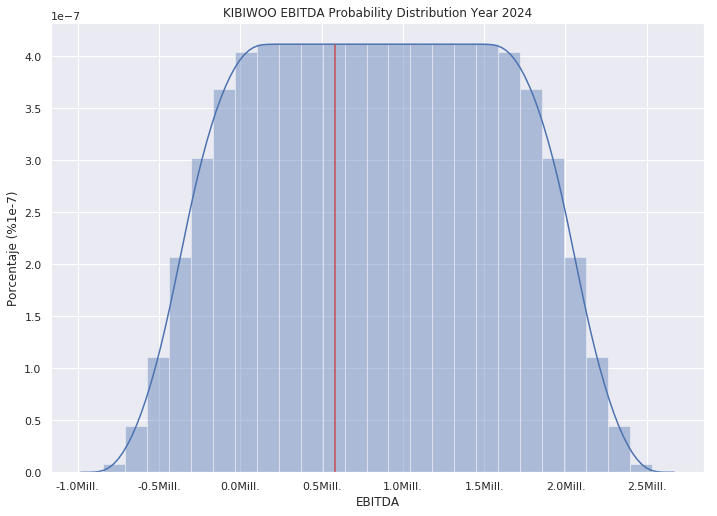

In [64]:
ax = sns.distplot(is_kib_2017.ebitda, bins=25)
ax.axvline(+580000, 0, 0.95, color='r')
ax.set_title('KIBIWOO EBITDA Probability Distribution Year 2024')
ax.set_xlabel('E.B.I.T.D.A.')
ax.set_ylabel('Porcentaje (%1e-7)')
xlabels = ['{:.1f}'.format(x) + 'Mill.' for x in ax.get_xticks()/1000000]
ax.set_xticklabels(xlabels)

In [61]:
is_kib_2017.ebitda.sort()

In [62]:
print("{:.1%}".format(len(is_kib_2017.ebitda[is_kib_2017.ebitda > 800000])/len(is_kib_2017.ebitda)))

51.8%


In [ ]:
def create_data(pl_entries):
    """
    Function for creating a pandas dataframe that contains as columns each P&L line and as data
    the numpy array for each line with all possible values.
    
    Args:
        - pl_entries....List containing all the lines of the P&L.
        
    Returns:
        A pandas dataframe with columns name the P&L lines and values a numpy array of the intervals for each line
    """
    data = {}
    for line in pl_entries:
        start, stop, num_steps = create_interval(line)
        print("Line has values (start={:d}, stop={:d}, num_steps={:d})\n".format(start, stop, num_steps))
        data[line] = create_array()
    return data